# 분류 모델의 분류 성능 평가

- 분류문제는 회귀 분석과 달리 다양한 성능평가 기준이 필요함

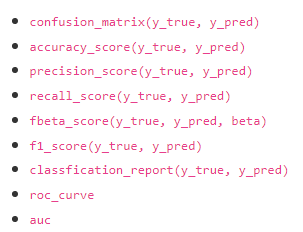

## 분류 결과표(Confusion Matrix)

- Target의 원래 클래스와 모형이 예측한 클래스가 일치하는지 갯수로 센 결과를 표로 나타낸 것
- 정답 클래스는 행(row)으로, 예측한 클래스는 열(columns)으로 나타냄

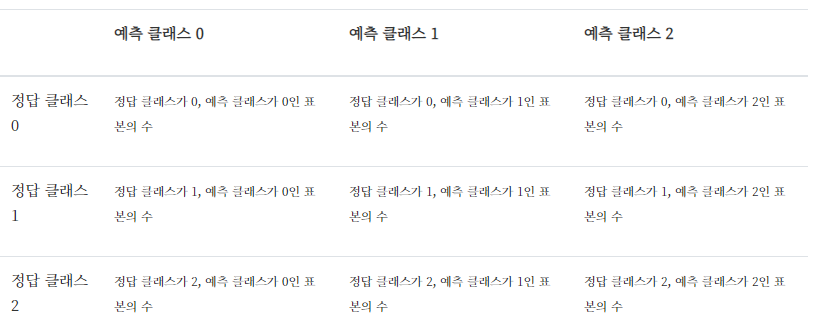

In [1]:
from sklearn.metrics import confusion_matrix

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

In [3]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

## 이진 분류결과표

- 클래스가 0과 1 두 종류 밖에 없는 이진 분류의 경우, 일반적으로 클래스 이름을 양성(Positive)와 음성(Negative)로 표시
- 이진 분류결과표(Binary Confusion Matrix)는 아래와 같음

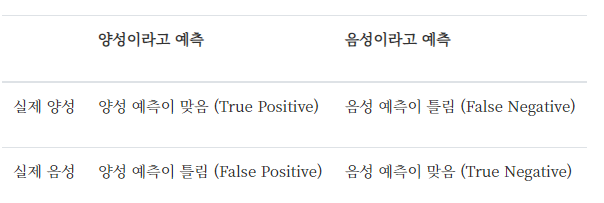

- 분류 모형의 예측 결과가 맞은 경우, 양성을 양성이라 예측/ 음성을 음성이라 예측한 경우 참(True)
- 분류 모형의 예측 결과가 틀린 경우, 양성을 음성이라 예측/ 음성을 양성이라 예측한 경우 거짓(False)

### 이진 분류시스템 예

- 제품 생산 제조공장의 품질 테스트(양성이면 불량품/ 음성이면 양품(정상품)

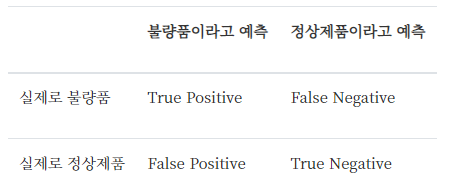

- 암(Cancer, 악성종양) 검진 때도 암에 걸린 것이 양성(Positive), 걸리지 않은 것이 음성(Negative)
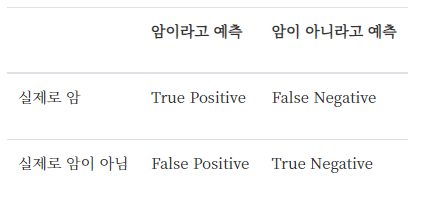


- FDS(Fraud Detection System) 예측 결과가 양성이면 사기거래, 음성이면 정상거래
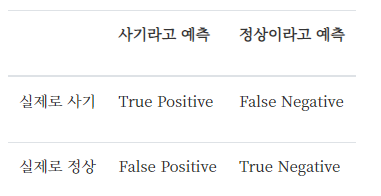


In [4]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [6]:
confusion_matrix(y_true, y_pred, labels=[1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

=> `confusion_matrix` 명령 사용 시 클래스 순서가 0,1,2 순서로 출력되므로 labels 인수를 사용하여 사용자가 순서를 바꿈

## 평가점수

- 이진 분류평가표로부터 하나의 평가점수(score)를 계산하여, 그 값을 최종적인 기준으로 사용하는 경우가 많음
- 관점에 따라 다양한 평가점수가 쓰임 `정확도(accuracy)`, `정밀도(precision)`, `재현율(recall)`

#### `정확도(Accuracy)` 
- 전체 sample 중 맞게 예측한 sample의 수의 비율 (높을 수록 좋은 모형)
- 학습에서의 최적화 목적함수로 사용

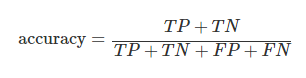

#### `정밀도(Precision)` 
- 양성 클래스에 속한다고 출력한 sample 중 실제로 양성 클래스에 속하는 sample 수의 비율 (높을 수록 좋은 모형)
- 예를 들어, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율

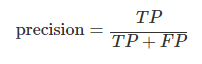


#### `재현율(Recall)` = `민감도(Sensitivity)`
- 실제 양성 클래스에 속한 표본 중 양성 클래스에 속한다고 출력한 표본 수의 비율 (높을 수록 좋은 모형)
- 예를 들어, 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율 `TPR(True Positive rate)`

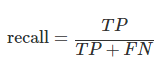


#### `위양성율(fall-out)`
- 실제 양성 클래스에 속하지 않는 표본 중에서 양성 클래스에 속한다고 출력한 표본의 비율 (낮을 수록 좋은 모형)
- 예를 들어, 실제 정상 거래인데, 사기 거래라고 예측한 거래의 비율 `FPR(False Positive Rate)`, `1-위양성율 = 특이도(Specificity)`

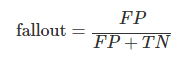


#### `F점수`
- 정밀도와 재현율의 `가중조화평균(weight harmonic average)`을 `F점수(F-score)`라 함
- 정밀도에 주어지는 가중치를 베타(beta)라고 함
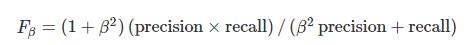
- beta가 1일 경우에 F1점수라 함
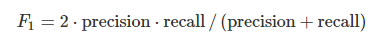


In [7]:
from sklearn.metrics import classification_report

y_true = [0,0,0,1,1,0,0]
y_pred = [0,0,0,0,1,1,1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



- 위 classification_report 결과에서 0이라고 예측한 데이터의 75%만 실제로 0이었고, 1이라 예측한 데이터의 33%만 실제로 1임
- 실제 0인 데이터 중의 60%만 0으로 판별되었고, 실제 1인 데이터 중의 50%만 1로 판별되었음을 알 수 있음

- 다중 클래스 문제의 경우 각각의 클래스에 대해 자신을 양성 클래스로, 다른 클래스를 음성 클래스로 가정하여 OvR 문제를 풀고,
- 각각에 대해 정밀도, 재현율, 위양성률 등의 평가 점수를 구함. 
- 이렇게 하면 클래스별로 다른 평가점수가 나와, 이를 하나로 합치는 일종의 평균을 구해야 하는데 아래와 같은 기준을 사용

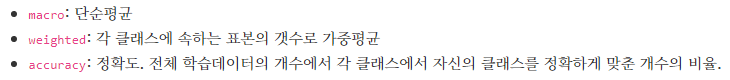


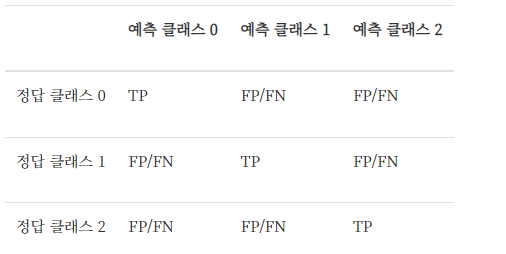

In [8]:
y_true= [0,0,1,1,2,2,2]
y_pred= [0,0,1,2,2,2,1]

target_names=['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



## ROC 커브

- 평가 점수 중 재현율(recall)과 위양성률(fall-out)은 일반적으로 Trade-off 가 있음
- 재현율을 높이기 위해서는 양성으로 판단하는 기준(threshold)를 낮추어 약간의 증거만 있어도, 양성으로 판단하도록 하면 됨
- 그러나, 이렇게 되면 음성임에도 양성으로 판단되는 표본 데이터가 같이 증가하여 위양성율이 동시에 증가함
- 반대로 위양성율을 낮추기 위해 양성을 판단하는 기준을 엄격하게 두게 되면 증거 부족으로 음성 판단을 받는 표본 데이터의 수가 증가해, 재현율이 떨어짐

#### `ROC(Receiver Operator Characteristic)` 
- 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화 한 것
- 모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별함수(discriminatn function)을 가지며, 판별함수값이 음수이면 0 클래스, 양수이면 1인 클래스에 해당한다고 판별함. 즉, 0이 클래스 판별 기준값이 됨. 
- ROC 커브는 이 클래스 판별 기준값이 달라지면 판별 결과가 어떻게 달라지는지 표현함

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [19]:
X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=0)


model = LogisticRegression().fit(X,y)
y_hat = model.predict(X)
f_value = model.decision_function(X)


In [20]:
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=['f','y_hat','y'])
df.sort_values('f', ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


<ROC 커브 작성>

- 1. 현재는 0을 기준값(threshold)으로 클래스를 구분하여, 판별함수값이 0보다 크면 양성(Positive), 작으면 음성(Negative)이 됨
- 2. 데이터 분류가 다르게 되도록 기준값을 증가 혹은 감소 시킴. 위의 표에서는 기준값을 0.378296보다 크도록 올리면 6번 데이터는 더이상 양성이 아님.
- 기준값을 여러가지 방법으로 증가 혹은 감소시키면서 이를 반복하면 여러가지 다른 기준값에 대해 분류 결과가 달라지고 재현율, 위양성률의 성능평가 점수도 달라짐

In [25]:
confusion_matrix(y, y_hat, labels=[1,0])

array([[7, 1],
       [1, 7]], dtype=int64)

In [28]:
recall = 7 / (7+1)
fallout = 1 / (1+7)

print(f"Recall : {recall:.2f}")
print(f"Fallout : {fallout:.2f}")

Recall : 0.88
Fallout : 0.12


#### 사이킷런 패키지는 위 과정을 자동화한 roc_curve 명령 제공

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.36316277,  2.36316277,  1.21967832,  0.37829565,  0.09428499,
        -0.76588836, -0.92693183, -4.11896895]))

In [30]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([1.9139748 , 0.9139748 , 0.77200693, 0.59346197, 0.5235538 ,
        0.31736921, 0.28354759, 0.01600107]))

In [32]:
import matplotlib.pyplot as plt

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\matplotlib\backends\ba

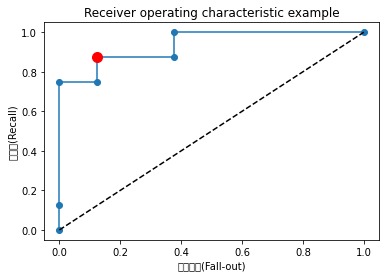

In [33]:
plt.plot(fpr, tpr, 'o-', label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성율(Fall-out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [34]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [38]:
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X,y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)
y_hat2 = model2.predict(X)

In [39]:
print(confusion_matrix(y,y_hat1))

[[940   3]
 [ 30  27]]


In [41]:
print(confusion_matrix(y,y_hat2))

[[940   3]
 [ 30  27]]


In [43]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [44]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



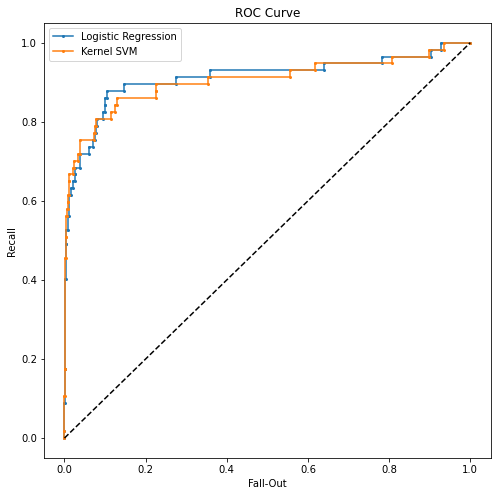

In [47]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, 'o-', ms=2, label='Logistic Regression')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='Kernel SVM')
plt.legend()
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()

## AUC

- AUC(Area Under the Curve)는 ROC curve의 면적을 뜻함
- 위 양성률값이 같을 때 재현률값이 크거나,재현률값이 같을때 위양성률값이 작을수록 AUC가 1에 가까운 값이고 좋은모형

In [48]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

- 다중 클래스에 대해서는 정밀도, 재현율을 구하거나 ROC 커브를 그릴 수 없으므로 각각의 클래스에 대해 OvR 문제를 가정하고,
- 각각의 OvR 문제에 대해 ROC 커브를 그림

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0,1,2])

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


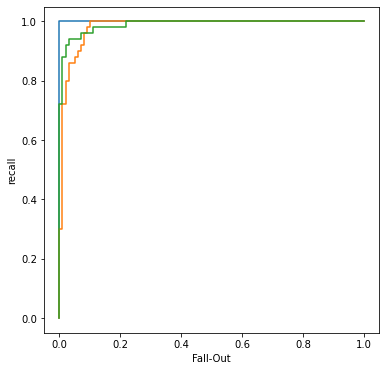

In [58]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

plt.figure(figsize=(6,6))
for i in range(3):
    model = GaussianNB().fit(X,y[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:,1])
    plt.plot(fpr[i], tpr[i])
    
plt.xlabel('Fall-Out')
plt.ylabel('recall')
plt.show()